# TV Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [2]:
df= pd.read_excel('./859181_INDICES_v_3_conductas.xlsx', header= 4)

In [3]:
df ['Fecha']=pd.to_datetime(df['Fecha'])
df.head()

,Unnamed: 0,SP,Fecha,Resol. No.,Empresas,Mercado,Categoria,Conducta,Conducta categorizadas,Sancion,DETALLE,Unnamed: 11
0,NaN,326599,2002-10-17,46,"Beverage Associates Corp, Quilmes Industrialm ...",Mercado de la cerveza,bebidas,Carteles - Acuerdo de Precios - Archivo,Cartelizacion,Archivo,Realización de una operación de concentración ...,NaN
1,NaN,323089,1980-11-09,[127],The Buenos Aires Herald Ltda. / Sociedad de Di...,Distribución de diarios.,comunicacion,Distribución - Negativa -,NaN,Archivo,_,NaN
2,NaN,321373,1981-04-12,124,Acindar Industria Argentina de Aceros S.A. / S...,MANUFACTURING Fabricación de metales comunes -...,energia,Póliticas de precios - Guerra de precios - Con...,NaN,Archivo,Para que la guerra de precios pueda considerar...,NaN
3,NaN,321185,1981-08-09,257,Juan Ignacio Borchex y Oscar Dos Reis / Asocia...,Servicio funerario,funerario,Abuso de posición dominante,Abuso posicion dominante,Archivo,Extensión de servicio mutual a personas no mut...,NaN
4,NaN,321190,1981-08-18,302,Tiboni y Cía S.R.L. / Sorensen y Cía. S.R.L.,Pantógrafos (calado o perforado de cristales p...,automotor,Trato exclusivo - patentes,NaN,Archivo,La denunciada ejerció una serie de presiones s...,NaN


In [4]:
#convertir todas las que son str lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

#eliminar los simbolos
df['Mercado'] = [re.sub("[\W+]",' ', str(x)) for x in df['Mercado']]
df['Conducta']= [re.sub("[\W+]",' ', str(x)) for x in df['Conducta']]

##convertir esto en una lista de palabras a eliminar.
filtrar = ['mercado', 'servicio', 'servicios', 'fabricación', 'fabricacion', 'fabricacion', 'manufacturing', 'mencionado', 'productos']
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))
filtrar1 = ['archivo', 'nan'] 
df ['Conducta'] = df ['Conducta'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar1)]))

#eliminamos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Conducta'] = df['Conducta'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

##Tareas: en donde es nan el mercado, buscar completar. 
df.replace('', np.nan, inplace=True)

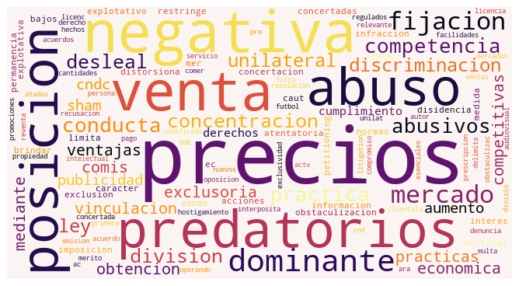

In [5]:
df_tv = df [df["Categoria"] == "television"].copy()
df_tv.reset_index(drop=True, inplace=True)
df_tv.shape

texto = df_tv[df_tv ['Conducta'].notnull()]['Conducta'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
df_tv.shape

(66, 12)

In [7]:
#eliminar los simbolos
df_tv['Resol. No.'] = [re.sub("[\D+]",'', str(x)) for x in df_tv['Resol. No.']]

In [8]:
list= df_tv ['Resol. No.'].unique()
list

##eliminar el 187 porque los que trae no son consistentes. 
#convertir a float. 

array(['71', '161', '243', '187', '524', '1136', '336', '850', '123',
       '445', '248', '351', '28', '130', '14', '23', '22', '39', '37',
       '17', '47', '78', '25', '67', '66', '51', '68', '110', '112', '82',
       '122', '84', '174', '175', '86', '150', '20', '166', '219', '19',
       '149', '218', '249', '329', '778', '655', '691', '741', '45', '53',
       '361', '371', '444', '124', '38784640', '572', '595'], dtype=object)

In [9]:
df_consolidado = pd.read_csv('CNDC_consolidado.csv', parse_dates=[5])
df_conducta = df_consolidado[df_consolidado["Tipo de Documento"] == "Conductas"].copy()
df_conducta.reset_index(drop=True, inplace=True)
df_conducta.shape

(855, 11)

In [10]:
df_filtered= df_conducta[df_conducta ['Nro. de Resolucion'].isin([71, 161, 243, 524, 1136, 336, 850, 122, 123,
       445, 248, 351, 28, 123, 130, 14, 23, 22, 39,
       37, 17, 47, 78, 25, 67, 66, 51, 68, 110, 112,
       82, 84, 174, 175, 86, 150, 20, 166, 219,
       19, 149, 218, 249, 329, 778, 655, 691,
       741, 45, 53, 361, 371, 444, 124, 38784640, 572,
       595])]

In [11]:
df_filtered.reset_index(drop=True, inplace=True)
#renombro el dataset que voy a depurar
df_filtered.rename (columns={"Nro. de Dictamen": "dictamen"}, inplace = True)

C:\Users\GABRIELA\Miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
#tienen todo mal catalogado el dataset de la CNDC. 
#df_filtered = df_filtered [df_filtered.Industria != 'ARTE']
#df_filtered = df_filtered [df_filtered.Industria != 'ENTRETENIMIENTO Y RECREACIÓN']
#df_filtered = df_filtered [df_filtered.Industria != 'AGRICULTURA']
#df_filtered = df_filtered [df_filtered.Industria != 'PESCA FORESTACIÓN']
#df_filtered = df_filtered [df_filtered.Industria != 'ACTIVIDADES FINANCIERAS Y DE SEGUROS']
#df_filtered = df_filtered [df_filtered.Industria != 'ENERGÍA ELÉCTRICA, SUMINISTRO DE GAS, VAPOR Y AA']
#df_filtered = df_filtered [df_filtered.Industria != 'TRANSPORTE Y ALMACENAMIENTO']
#df_filtered = df_filtered [df_filtered.Industria != 'ACTIVIDADES SANITARIAS Y SOCIALES']
#df_filtered = df_filtered [df_filtered.Industria != 'MANUFACTURING']
#df_filtered = df_filtered [df_filtered.Industria != 'COMERCIO AL POR MAYOR/MENOR; REPARACIÓN VEHÍCULOS DE MOTOR Y MOTOC.']
#df_filtered = df_filtered [df_filtered.Industria != 'ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILIARES']
#df_filtered = df_filtered [df_filtered.Industria != 'SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTIÓN DE RESIDUOS Y DESCONTAMINACIÓN']
##df_filtered = df_filtered [df_filtered.Industria != 'ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS']

In [13]:
#duplicados de la resolucion 71. 
df_filtered = df_filtered [df_filtered.dictamen != 553]
df_filtered = df_filtered [df_filtered.dictamen != 111]
df_filtered = df_filtered [df_filtered.dictamen != 78]
##duplicados de la resolucion 71. 
df_filtered = df_filtered [df_filtered.dictamen != 176]
### duplicados de la resolucion 122
df_filtered = df_filtered [df_filtered.dictamen != 489]
df_filtered = df_filtered [df_filtered.dictamen != 1045]
##duplicados de la resolucion 28
df_filtered = df_filtered [df_filtered.dictamen != 441]
df_filtered = df_filtered [df_filtered.dictamen != 387]
####duplicados de la resolucion 130
df_filtered = df_filtered [df_filtered.dictamen != 915]
df_filtered = df_filtered [df_filtered.dictamen != 545]
df_filtered = df_filtered [df_filtered.dictamen != 484]
df_filtered = df_filtered [df_filtered.dictamen != 767]
###duplicados de la resolucion 14
df_filtered = df_filtered [df_filtered.dictamen != 84]
df_filtered = df_filtered [df_filtered.dictamen != 531]
df_filtered = df_filtered [df_filtered.dictamen != 433]
df_filtered = df_filtered [df_filtered.dictamen != 409]
df_filtered = df_filtered [df_filtered.dictamen != 392]
df_filtered = df_filtered [df_filtered.dictamen != 204]
###duplicados de la resolucion 23
df_filtered = df_filtered [df_filtered.dictamen != 185]
df_filtered = df_filtered [df_filtered.dictamen != 420]
df_filtered = df_filtered [df_filtered.dictamen != 407]
###duplicados de la resolucion 22
df_filtered = df_filtered [df_filtered.dictamen != 137]
###duplicados de la resolucion 39
df_filtered = df_filtered [df_filtered.dictamen != 663]
df_filtered = df_filtered [df_filtered.dictamen != 217]
df_filtered = df_filtered [df_filtered.dictamen != 142]
###duplicados de la resolucion 37
df_filtered = df_filtered [df_filtered.dictamen != 233]
df_filtered = df_filtered [df_filtered.dictamen != 135]
df_filtered = df_filtered [df_filtered.dictamen != 22]
###duplicados de la resolucion 17
df_filtered = df_filtered [df_filtered.dictamen != 743]
df_filtered = df_filtered [df_filtered.dictamen != 702]
df_filtered = df_filtered [df_filtered.dictamen != 317]
df_filtered = df_filtered [df_filtered.dictamen != 227]
###duplicados de la resolucion 47
df_filtered = df_filtered [df_filtered.dictamen != 94]
###duplicados de la resolucion 78
df_filtered = df_filtered [df_filtered.dictamen != 4]
df_filtered = df_filtered [df_filtered.dictamen != 491]
df_filtered = df_filtered [df_filtered.dictamen != 13]
###duplicados de la resolucion 25
df_filtered = df_filtered [df_filtered.dictamen != 421]
df_filtered = df_filtered [df_filtered.dictamen != 138]
###duplicados de la resolucion 67
df_filtered = df_filtered [df_filtered.dictamen != 539]
df_filtered = df_filtered [df_filtered.dictamen != 145]
df_filtered = df_filtered [df_filtered.dictamen != 60]
###duplicados de la resolucion 66
df_filtered = df_filtered [df_filtered.dictamen != 977]
###duplicados de la resolucion 51
df_filtered = df_filtered [df_filtered.dictamen != 114]
###duplicados de la resolucion 112
df_filtered = df_filtered [df_filtered.dictamen != 665]
df_filtered = df_filtered [df_filtered.dictamen != 357]
df_filtered = df_filtered [df_filtered.dictamen != 97]
###duplicados de la resolucion 82
df_filtered = df_filtered [df_filtered.dictamen != 555]
df_filtered = df_filtered [df_filtered.dictamen != 183]
###duplicados de la resolucion 84
df_filtered = df_filtered [df_filtered.dictamen != 557]
df_filtered = df_filtered [df_filtered.dictamen != 21]
###duplicados de la resolucion 174
df_filtered = df_filtered [df_filtered.dictamen != 467]
df_filtered = df_filtered [df_filtered.dictamen != 132]
###duplicados de la resolucion 175
df_filtered = df_filtered [df_filtered.dictamen != 1338]
df_filtered = df_filtered [df_filtered.dictamen != 133]
###duplicados de la resolucion 20
df_filtered = df_filtered [df_filtered.dictamen != 42594380]
df_filtered = df_filtered [df_filtered.dictamen != 526]
df_filtered = df_filtered [df_filtered.dictamen != 436]
df_filtered = df_filtered [df_filtered.dictamen != 406]
###duplicados de la resolucion 19
df_filtered = df_filtered [df_filtered.dictamen != 699]
df_filtered = df_filtered [df_filtered.dictamen != 419]
###duplicados de la resolucion 149
df_filtered = df_filtered [df_filtered.dictamen != 439]
###duplicados de la resolucion 218
df_filtered = df_filtered [df_filtered.dictamen != 1060]
###duplicados de la resolucion 778
df_filtered = df_filtered [df_filtered.dictamen != 57603276]
###duplicados de la resolucion 655
df_filtered = df_filtered [df_filtered.dictamen != 57603276]
###duplicados de la resolucion 45
df_filtered = df_filtered [df_filtered.dictamen != 734]
df_filtered = df_filtered [df_filtered.dictamen != 445]
df_filtered = df_filtered [df_filtered.dictamen != 72]
###duplicados de la resolucion 53
df_filtered = df_filtered [df_filtered.dictamen != 688]
###duplicados de la resolucion 361
df_filtered = df_filtered [df_filtered.dictamen != 102]
###duplicados de la resolucion 124
df_filtered = df_filtered [df_filtered.dictamen != 513]
df_filtered = df_filtered [df_filtered.dictamen != 818]
df_filtered = df_filtered [df_filtered.dictamen != 556]
df_filtered = df_filtered [df_filtered.dictamen != 172]
df_filtered = df_filtered [df_filtered.dictamen != 14]

In [14]:
#para limpiar 
#38784640 esta hay que pedirla por correo. 
##df_filtered.loc[df_filtered['Nro. de Resolucion'] == 595]

In [15]:
##df_tv.loc[df_tv['Resol. No.'] == '595']

In [16]:
df_tv. shape

(66, 12)

In [17]:
df_filtered.shape

(62, 11)

In [18]:
df_filtered. Industria. unique()

array(['INFORMACIÓN Y COMUNICACIÓN', ' ',
       'ARTE, ENTRETENIMIENTO Y RECREACIÓN',
       'ACTIVIDADES FINANCIERAS Y DE SEGUROS',
       'TRANSPORTE Y ALMACENAMIENTO', 'ACTIVIDADES SANITARIAS Y SOCIALES',
       'SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTIÓN DE RESIDUOS Y DESCONTAMINACIÓN',
       'ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS'], dtype=object)

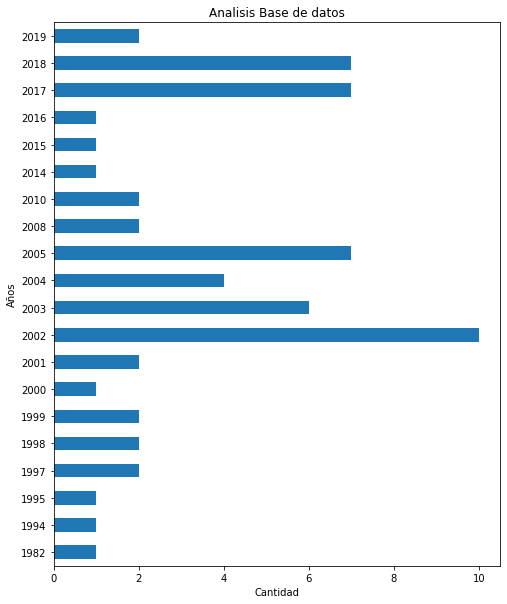

In [19]:
plt.figure(figsize=(8,10))
df_filtered.groupby(df_filtered.Fecha.dt.year).size().plot(kind='barh')
plt.ylabel('Años')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.show()

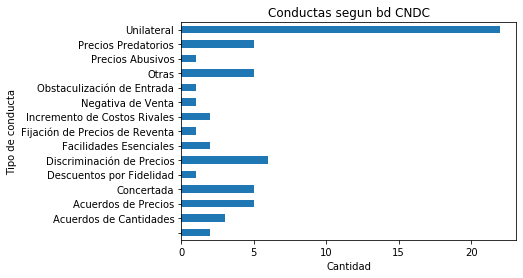

In [20]:
##por conducta
df_filtered.groupby(['Tipo de Conducta/ Concentracion 1']).size().plot(kind='barh')
plt.ylabel('Tipo de conducta')
plt.xlabel('Cantidad')
plt.title('Conductas segun bd CNDC')
plt.show()

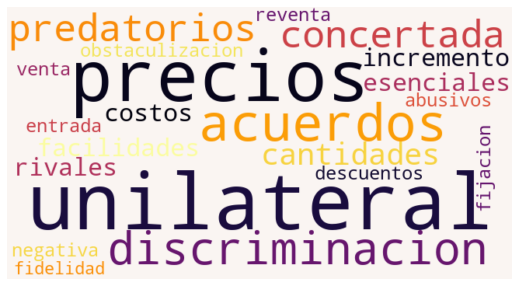

In [27]:
texto = df_filtered[df_filtered ['Tipo de Conducta/ Concentracion 1'].notnull()]['Tipo de Conducta/ Concentracion 1'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()